# Name = Piyush Nitnaware

# Task 1 = House Price Prediction

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv('kc_house_data.csv')

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.shape

(21613, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [ ]:
df = df.drop(["id","date"], axis = 1)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141767,367127.196483,75000.0000,321950.000,450000.0000,645000.000,7.700000e+06
bedrooms,21613.0,3.370842,0.930062,0.0000,3.000,3.0000,4.000,3.300000e+01
bathrooms,21613.0,2.114757,0.770163,0.0000,1.750,2.2500,2.500,8.000000e+00
sqft_living,21613.0,2079.899736,918.440897,290.0000,1427.000,1910.0000,2550.000,1.354000e+04
sqft_lot,21613.0,15106.967566,41420.511515,520.0000,5040.000,7618.0000,10688.000,1.651359e+06
floors,21613.0,1.494309,0.539989,1.0000,1.000,1.5000,2.000,3.500000e+00
waterfront,21613.0,0.007542,0.086517,0.0000,0.000,0.0000,0.000,1.000000e+00
view,21613.0,0.234303,0.766318,0.0000,0.000,0.0000,0.000,4.000000e+00
condition,21613.0,3.409430,0.650743,1.0000,3.000,3.0000,4.000,5.000000e+00
grade,21613.0,7.656873,1.175459,1.0000,7.000,7.0000,8.000,1.300000e+01


In [ ]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']

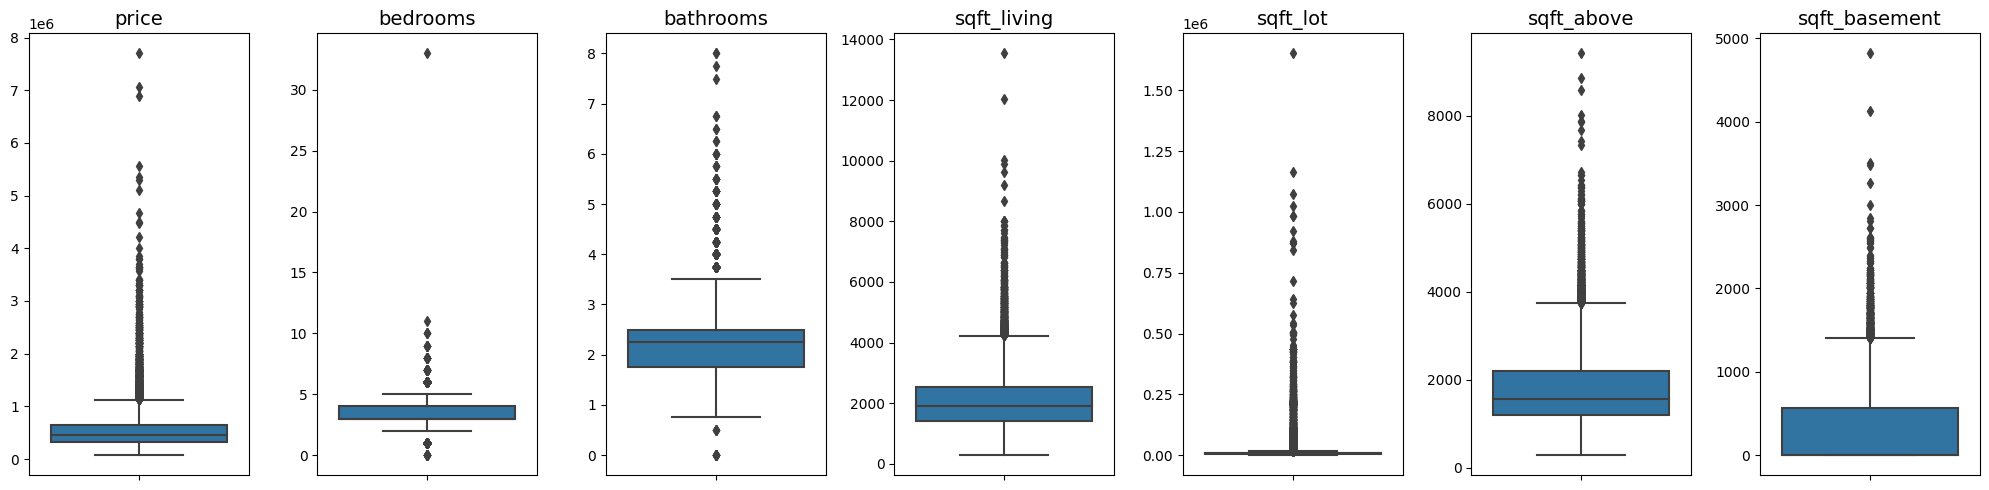

In [ ]:
fig, axes = plt.subplots(1, len(cols), figsize=(20, 5))

for i, col in enumerate(cols):
    sns.boxplot(y=col, data=df, ax=axes[i])
    axes[i].set_title(col, fontsize=14)
    axes[i].set_ylabel('')

plt.tight_layout()

plt.show()

In [ ]:
# Remove outliers for price column
price_upper_limit = 5000000
df = df[df['price'] <= price_upper_limit]

# Remove outliers for bedrooms column
bedrooms_upper_limit = 8
df = df[df['bedrooms'] <= bedrooms_upper_limit]

# Remove outliers for bathrooms column
bathrooms_upper_limit = 6
df = df[(df['bathrooms'] < bathrooms_upper_limit) & (df['bathrooms'] >= 1)]

# Remove outliers for sqft_living column
sqft_living_upper_limit = 8500
df = df[df['sqft_living'] <= sqft_living_upper_limit]

# Remove outliers for sqft_lot column
sqft_lot_upper_limit = 60000
df = df[df['sqft_lot'] <= sqft_lot_upper_limit]

# Remove outliers for sqft_above column
sqft_above_upper_limit = 7000
df = df[df['sqft_above'] <= sqft_above_upper_limit]

# Remove outliers for sqft_basement column
sqft_basement_upper_limit = 3000
df = df[df['sqft_basement'] <= sqft_basement_upper_limit]

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,20784.0,533736.394246,347312.703345,78000.0000,320000.000000,449950.0000,638000.0000,4.500000e+06
bedrooms,20784.0,3.369611,0.889687,0.0000,3.000000,3.0000,4.0000,8.000000e+00
bathrooms,20784.0,2.105863,0.748682,1.0000,1.500000,2.2500,2.5000,5.750000e+00
sqft_living,20784.0,2053.479022,871.828269,390.0000,1420.000000,1900.0000,2520.0000,7.710000e+03
sqft_lot,20784.0,9499.097238,8527.613327,520.0000,5000.000000,7497.0000,10159.2500,5.986300e+04
floors,20784.0,1.493962,0.541565,1.0000,1.000000,1.5000,2.0000,3.500000e+00
waterfront,20784.0,0.006977,0.083236,0.0000,0.000000,0.0000,0.0000,1.000000e+00
view,20784.0,0.226135,0.752969,0.0000,0.000000,0.0000,0.0000,4.000000e+00
condition,20784.0,3.412673,0.651061,1.0000,3.000000,3.0000,4.0000,5.000000e+00
grade,20784.0,7.641455,1.143215,4.0000,7.000000,7.0000,8.0000,1.300000e+01


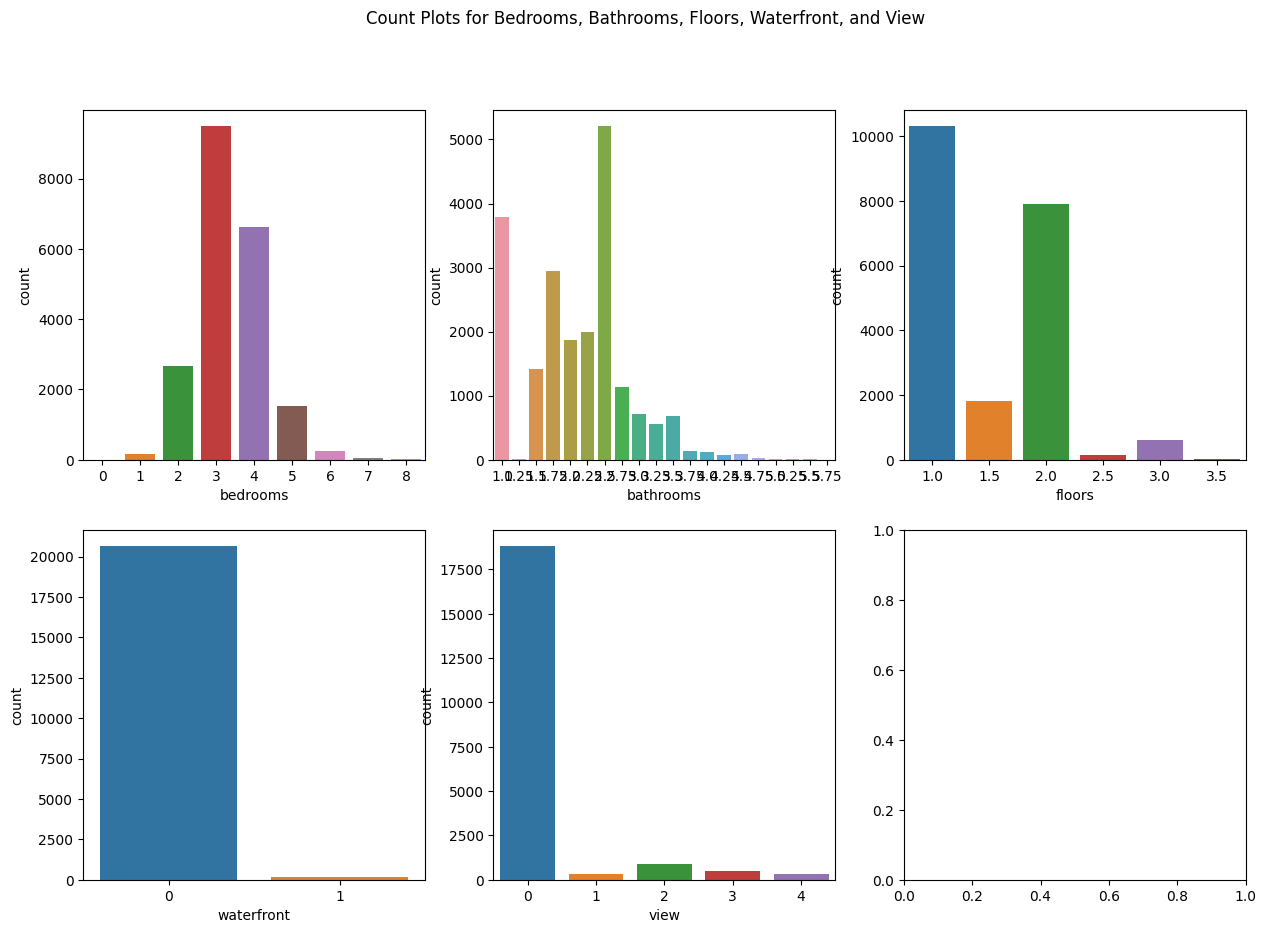

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

sns.countplot(x='bedrooms', data=df, ax=axes[0,0])
sns.countplot(x='bathrooms', data=df, ax=axes[0,1])
sns.countplot(x='floors', data=df, ax=axes[0,2])
sns.countplot(x='waterfront', data=df, ax=axes[1,0])
sns.countplot(x='view', data=df, ax=axes[1,1])

fig.suptitle("Count Plots for Bedrooms, Bathrooms, Floors, Waterfront, and View")

plt.show()

<Axes: >

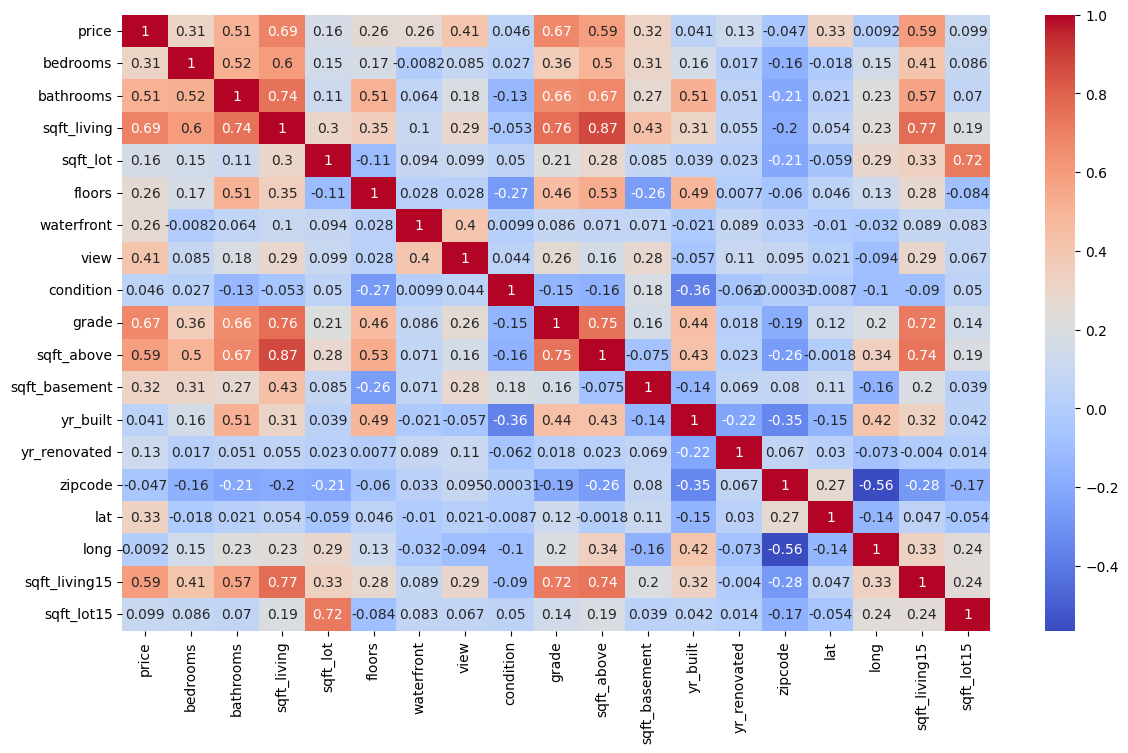

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [ ]:
df = df.drop(["zipcode", "yr_built", "condition"], axis = 1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,7,1180,0,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,7,2170,400,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,6,770,0,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,7,1050,910,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,8,1680,0,0,47.6168,-122.045,1800,7503


In [ ]:
Floor_Value_counts = df["floors"].value_counts().to_frame()
Floor_Value_counts

,floors
1.0,10301
2.0,7899
1.5,1820
3.0,609
2.5,148
3.5,7


<Axes: xlabel='waterfront', ylabel='price'>

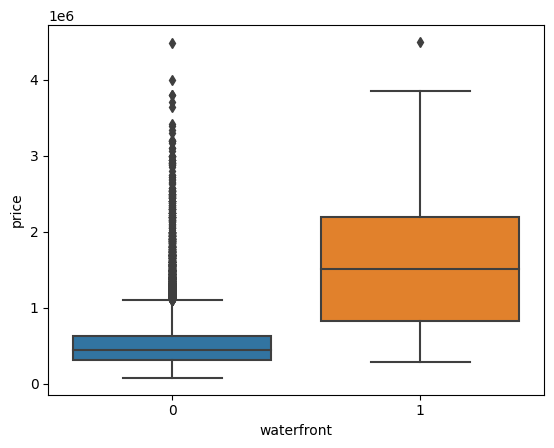

In [ ]:
sns.boxplot(x= "waterfront", y = "price", data = df)

<Axes: xlabel='sqft_above', ylabel='price'>

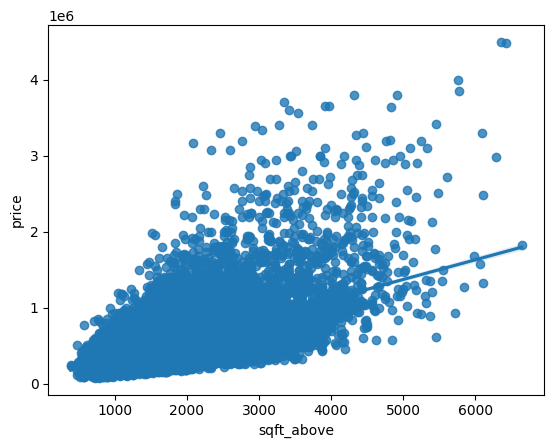

In [ ]:
sns.regplot(x="sqft_above", y ="price", data = df)

In [ ]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
X = df[features]
Y = df['price']

In [ ]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [ ]:
X = norm_func(X)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)
linear_reg_score = linear_reg.score(x_test, y_test)
print(f"Linear Regression R^2: {linear_reg_score}")

Linear Regression R^2: 0.6571371122715969


In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(x_train, y_train)
ridge_reg_score = ridge_reg.score(x_test, y_test)
print(f"Ridge Regression R^2: {ridge_reg_score}")

Ridge Regression R^2: 0.6571494130468067


In [ ]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x_train, y_train)
lasso_reg_score = lasso_reg.score(x_test, y_test)
print(f"Lasso Regression R^2: {lasso_reg_score}")

Lasso Regression R^2: 0.6571372148384217


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.423e+13, tolerance: 1.806e+11
  model = cd_fast.enet_coordinate_descent(


In [ ]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor()
decision_tree.fit(x_train, y_train)
decision_tree_score = decision_tree.score(x_test, y_test)
print(f"Decision Tree R^2: {decision_tree_score}")

Decision Tree R^2: 0.640729431177394


In [ ]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor()
random_forest.fit(x_train, y_train)
random_forest_score = random_forest.score(x_test, y_test)
print(f"Random Forest R^2: {random_forest_score}")

Random Forest R^2: 0.8159577715566948


In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
}


In [ ]:
random_forest = RandomForestRegressor()

grid_search = HalvingGridSearchCV(estimator=random_forest, param_grid=param_grid,
                          verbose=3)

In [ ]:
grid_search.fit(x_train, y_train)

n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 6
min_resources_: 59
max_resources_: 14548
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 360
n_resources: 59
Fitting 5 folds for each of 360 candidates, totalling 1800 fits
[CV 1/5] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=(train=0.916, test=0.410) total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=(train=0.884, test=0.709) total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=(train=0.930, test=0.204) total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=(train=0.818, test=0.547) total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=(train

HalvingGridSearchCV(estimator=RandomForestRegressor(),
                    param_grid={'bootstrap': [True, False],
                                'max_depth': [None, 10, 20, 30, 40],
                                'min_samples_leaf': [1, 2, 4],
                                'min_samples_split': [2, 5, 10],
                                'n_estimators': [10, 50, 100, 200]},
                    verbose=3)

In [ ]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(min_samples_leaf=2)

In [ ]:
best_model=grid_search.best_estimator_

In [ ]:
best_model_score = best_model.score(x_test, y_test)
best_model_score

0.8170245945440804

# **Conclusion :**

**So by using the Halving GridSearchCV we have got the best accuracy model i.e. 81.60%.**


**This is the final model of our Housing Prices Predictor with the accuracy of 81.60%**